In [71]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# grid search kernel for gaussian process classifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Open DF with countries encoded 

In [72]:
df = pd.read_csv('df_for_ML_v2.csv', index_col='date')
df.result.value_counts()

0    913
2    879
1    731
Name: result, dtype: int64

In [3]:
df.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'fifa_rank_delta', 'offense/defense_ratio', 'result'],
      dtype='object')

In [4]:
del df['fifa_rank_delta']
del df['offense/defense_ratio']
df['home_team_mean_offense_score']
df['away_team_mean_defense_score']

date
1993-08-08    71.669231
1993-08-15    86.150000
1993-08-25    62.080000
1993-08-29    74.773684
1993-09-05    78.536364
                ...    
2022-03-29    72.000000
2022-03-29    82.200000
2022-03-29    84.800000
2022-03-29    81.200000
2022-03-30    75.800000
Name: away_team_mean_defense_score, Length: 2523, dtype: float64

# removing some columsn to see if its working better

In [392]:
df = df[['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank', 'result']]

# Define X and y

In [5]:
X = df.drop(['result'], axis=1)
y = df['result']

In [6]:
X.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

## Scaling using StandScaler 
* I don't want "yet" to remove the few outliers 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1 , stratify=y) #, stratify=y)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1766, 12), (757, 12), (1766,), (757,))

In [9]:
from sklearn.preprocessing import StandardScaler
import sklearn

Scaller = StandardScaler()
 
# standardization 
X_train = Scaller.fit_transform(X_train) 
X_test =Scaller.fit_transform(X_test)

### Running almost all the Classifiers at once to have a general idea of the results 

In [404]:
names = ["Nearest Neighbors", "Logistic Regression","Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(n_neighbors=80),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(hidden_layer_sizes=(150,100,50), alpha = 0.05, 
                       max_iter = 50,activation = 'relu', learning_rate = 'constant', 
                       solver = 'adam' , early_stopping=True),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [405]:
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)

        # prediction_proba = clf.predict_proba(X_test)
        # logloss = log_loss(y_test,prediction_proba)
        # precision, recall, fscore, support = score(y_test, prediction)
        # conf_martrix = confusion_matrix(y_test, prediction)
        # clas_report = classification_report(y_test, prediction)

        print(name, accuracy)

Nearest Neighbors 0.5759577278731837
Logistic Regression 0.5891677675033025
Linear SVM 0.5878467635402906
RBF SVM 0.5931307793923382
Gaussian Process 0.5785997357992074
Decision Tree 0.5799207397622193
Random Forest 0.5653896961690885
MLP 0.560105680317041
AdaBoost 0.5521796565389696
Naive Bayes 0.5799207397622193
QDA 0.5693527080581242


# Run SVC 

In [10]:
from sklearn.svm import SVC
model = SVC(C= 1, gamma= 1)

In [11]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [12]:
model.fit(X_train,y_train)

SVC(C=1, gamma=1)

In [13]:
trainpr= model.predict(X_train)
errortrain = accuracy_score(y_train, trainpr)
print("the train score is " )
errortrain

the train score is 


0.9580973952434881

In [14]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpr))
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,2
actual,,,
0,626,4,9
1,20,479,13
2,17,11,587


In [15]:
print(classification_report(y_train, trainpr))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       639
           1       0.97      0.94      0.95       512
           2       0.96      0.95      0.96       615

    accuracy                           0.96      1766
   macro avg       0.96      0.96      0.96      1766
weighted avg       0.96      0.96      0.96      1766



# Test evaluation 

In [16]:
predts = model.predict(X_test)
errortest = accuracy_score(y_test, predts)
print("the test score is " )
errortest

the test score is 


0.618229854689564

In [17]:
combine = pd.DataFrame(dict(actual=y_test, predicted=predts))
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,2
actual,,,
0,193,43,38
1,83,78,58
2,41,26,197


In [18]:
print(classification_report(y_test, predts))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65       274
           1       0.53      0.36      0.43       219
           2       0.67      0.75      0.71       264

    accuracy                           0.62       757
   macro avg       0.60      0.60      0.60       757
weighted avg       0.61      0.62      0.61       757



In [19]:
model

SVC(C=1, gamma=1)

In [355]:
'''import pickle 
filename = 'light_model.pkl'
pickle.dump(model, open(filename, 'wb'))'''

## Gaussian Processes Classifier

In [63]:

model = GaussianProcessClassifier()

In [64]:

# perform the search
results = model.fit(X_train, y_train)

In [65]:
trainpr= results.predict(X_train)
errortrain = accuracy_score(y_train, trainpr)
print("the train score is " )
errortrain

the train score is 


0.8312570781426953

In [66]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpr))
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,2
actual,,,
0,572,28,39
1,93,364,55
2,53,30,532


In [67]:

print(classification_report(y_train, trainpr))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       639
           1       0.86      0.71      0.78       512
           2       0.85      0.87      0.86       615

    accuracy                           0.83      1766
   macro avg       0.84      0.82      0.83      1766
weighted avg       0.83      0.83      0.83      1766



### test 

In [68]:
testpr= results.predict(X_test)
errortest = accuracy_score(y_test, testpr)
print("the test score is " )
errortest

the test score is 


0.6010568031704095

In [69]:
combine = pd.DataFrame(dict(actual=y_test, predicted=testpr))
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,2
actual,,,
0,205,46,23
1,97,65,57
2,38,41,185


In [70]:

print(classification_report(y_test, testpr))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67       274
           1       0.43      0.30      0.35       219
           2       0.70      0.70      0.70       264

    accuracy                           0.60       757
   macro avg       0.58      0.58      0.57       757
weighted avg       0.59      0.60      0.59       757



## SGDClassfier 

In [166]:
from sklearn.linear_model import SGDClassifier

In [167]:
clf = SGDClassifier(loss="log_loss", penalty='elasticnet' ,  alpha = 0.01) 
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', penalty='elasticnet')

In [168]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.57


C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


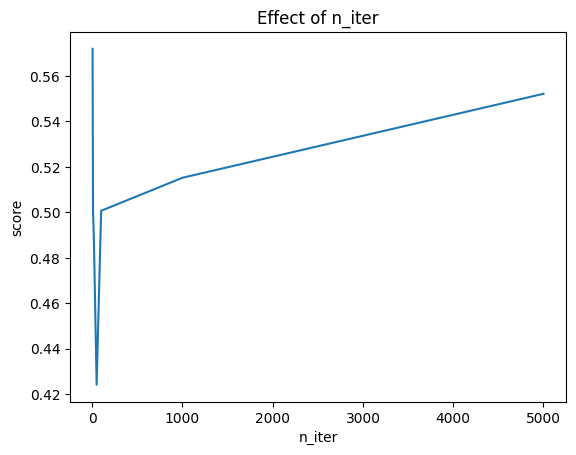

In [74]:
n_iters = [5, 10, 20, 50, 100, 1000,5000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

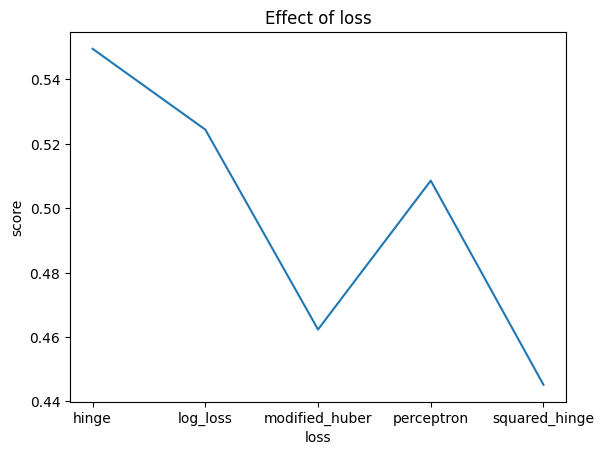

In [75]:
losses = ["hinge", "log_loss", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  

plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [ ]:
params = {
    "loss" : ["hinge", "log_loss", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=10000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(X_train, y_train)

print(grid.best_params_)

In [ ]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

## Train prediction and eval 

In [ ]:
trainpr= grid.predict(X_train)
errortrain = accuracy_score(y_train, trainpr)
print("the train score is " )
errortrain

In [ ]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpr))

In [ ]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

In [ ]:

print(classification_report(y_train, trainpr))

In [ ]:


display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, trainpr))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

## Test prediction and eval 

In [ ]:
predts = grid.predict(X_test)
errortest = accuracy_score(y_test, predts)
print("the test score is " )
errortest

In [ ]:
combine = pd.DataFrame(dict(actual=y_test, predicted=predts))

In [ ]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

In [ ]:

print(classification_report(y_test, predts))

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predts))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)


plt.show()

### Result for the SGDClassfier 
* Train accuracy is at 59 % and test accuracy at 58% 
* The model does not seems to overfit 


# KNN Classifier 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 12))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [416]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [80]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

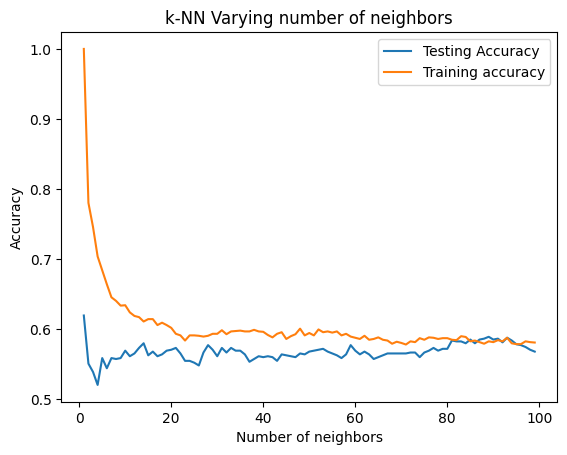

In [81]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=80)

In [23]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=80)

In [24]:
trainpr= knn.predict(X_train)
errortrain = accuracy_score(y_train, trainpr)
print("the train score is " )
errortrain

the train score is 


0.5866364665911665

In [25]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpr))

In [26]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,2
actual,,,
0,518,41,80
1,268,85,159
2,132,50,433


In [27]:

print(classification_report(y_train, trainpr))

              precision    recall  f1-score   support

           0       0.56      0.81      0.67       639
           1       0.48      0.17      0.25       512
           2       0.64      0.70      0.67       615

    accuracy                           0.59      1766
   macro avg       0.56      0.56      0.53      1766
weighted avg       0.57      0.59      0.55      1766



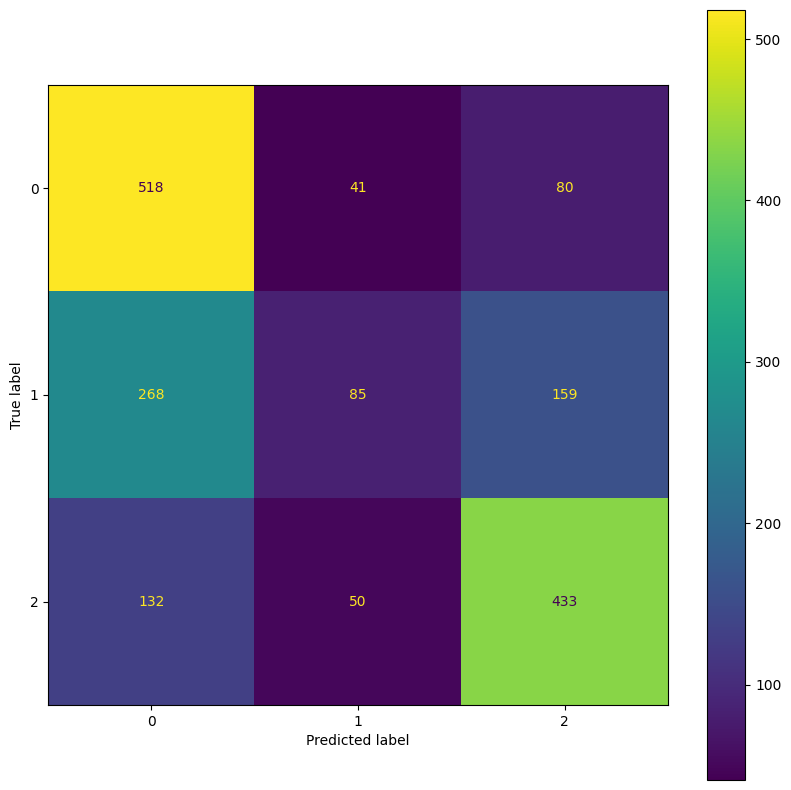

In [28]:


display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, trainpr))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

## test evaluation 

In [29]:
#Fit the model
knn.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=80)

In [30]:
testpr= knn.predict(X_test)
errortest = accuracy_score(y_test, testpr)
print("the test score is " )
errortest

the test score is 


0.5878467635402906

In [31]:
combine = pd.DataFrame(dict(actual=y_test, predicted=testpr))
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,2
actual,,,
0,209,35,30
1,85,54,80
2,39,43,182


In [32]:

print(classification_report(y_test, testpr))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       274
           1       0.41      0.25      0.31       219
           2       0.62      0.69      0.65       264

    accuracy                           0.59       757
   macro avg       0.55      0.57      0.55       757
weighted avg       0.56      0.59      0.57       757



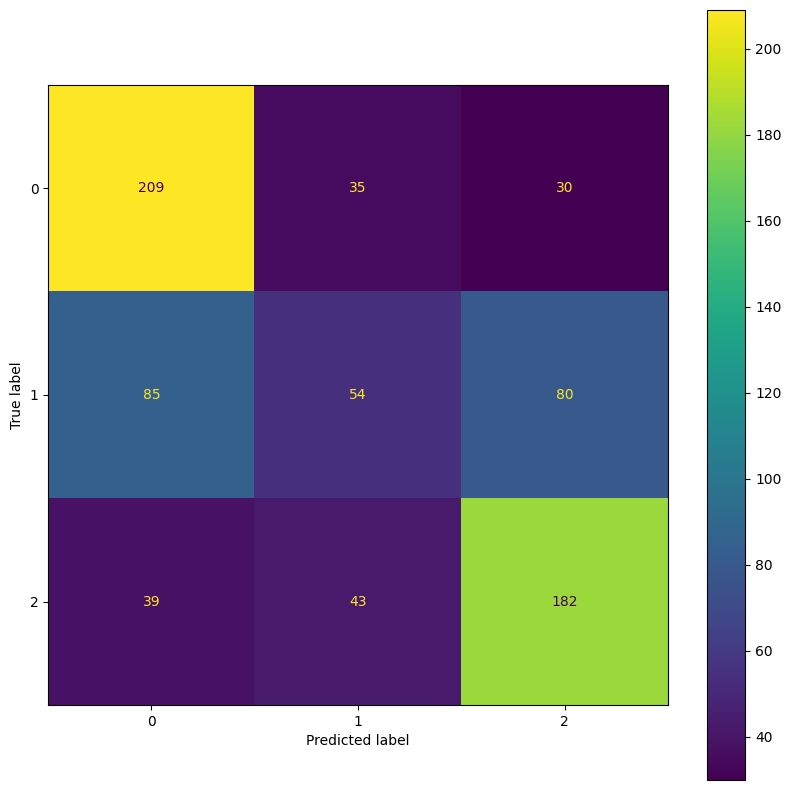

In [33]:

display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, testpr))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

### Result KNNClassifier 
* Accuracy on train is at 58% and 67% on test, still no overfitting
* Overall recall and precision are better than SGD
* Better result than SGDClassifier 

In [478]:
import pickle 
filename = 'finalized_model.pkl'
pickle.dump(knn, open(filename, 'wb'))

# Random classifier 

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(min_samples_split=10, random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 4)


In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [ ]:
CV_rfc.best_params_

In [37]:
trainpreds= rf.predict(X_train)
errortrain = accuracy_score(y_train, trainpreds)
print("the train score is " )
errortrain

the train score is 


0.9377123442808607

In [38]:
combine = pd.DataFrame(dict(actual=y_train, predicted=trainpreds))

In [39]:
pd.crosstab(index=combine["actual"], columns=combine["predicted"])

predicted,0,1,2
actual,,,
0,617,2,20
1,24,453,35
2,23,6,586


In [40]:

print(classification_report(y_train, trainpreds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       639
           1       0.98      0.88      0.93       512
           2       0.91      0.95      0.93       615

    accuracy                           0.94      1766
   macro avg       0.94      0.93      0.94      1766
weighted avg       0.94      0.94      0.94      1766



### Test 
* predict / accuracy / confusion matrix 

In [41]:
preds = rf.predict(X_test)

In [42]:
error = accuracy_score(y_test, preds)
print("the test score is " )
error

the test score is 


0.6155878467635403

In [43]:
combined = pd.DataFrame(dict(actual=y_test, predicted=preds))

In [44]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1,2
actual,,,
0,202,45,27
1,84,75,60
2,45,30,189


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67       274
           1       0.50      0.34      0.41       219
           2       0.68      0.72      0.70       264

    accuracy                           0.62       757
   macro avg       0.60      0.60      0.59       757
weighted avg       0.60      0.62      0.60       757



### Result for Random Classifier 
* Accuracy on train is at 93% and test 65% (It seems to overfit very well :c )

## New predictions

In [ ]:

df.loc[(df['away_team'] == 52 )].tail()

In [62]:
other_data_normalized


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [69]:
# New prediction knn

# Now predict Qatar/Ecuator
other_data = [[142,52,50,44, 73.93,71, 73.93, 73.93,73.93, 73.5 ,76, 74.5]]
other_data_normalized = Scaller.fit_transform(other_data)
result = knn.predict(other_data_normalized)
print("Le résultat de la prédiction pour léquipe qui recoit est") , result

Le résultat de la prédiction pour léquipe qui recoit est


(None, array([1], dtype=int64))

In [70]:
# New prediction knn

# Now predict England/Iran 

other_data = [[55,1,5,20, 83,73 , 85, 88,84, 69 ,75.3, 69]]
other_data_normalized = Scaller.fit_transform(other_data)
result = knn.predict(other_data_normalized)
print("Le résultat de la prédiction pour léquipe qui recoit est") , result

Le résultat de la prédiction pour léquipe qui recoit est


(None, array([1], dtype=int64))

In [66]:
other_data_normalized

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [74]:
df.head()

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,fifa_rank_delta,offense/defense_ratio,result
date,,,,,,,,,,,,,,,
1993-08-08,47,174,35,94,71.645833,69.000000,70.475926,75.477083,74.929167,71.669231,75.260000,74.592308,59,1.053131,2
1993-08-15,171,23,22,8,79.215190,87.596154,79.593671,83.616456,78.277215,86.150000,87.326923,85.873077,-14,0.970591,1
1993-08-25,45,95,10,84,80.428571,76.000000,78.645714,77.640000,79.231429,62.080000,64.566667,66.000000,74,1.250644,2
1993-08-29,6,123,5,67,80.960000,74.157895,83.172000,88.237333,84.616000,74.773684,77.610526,74.326316,62,1.180059,1
1993-09-05,6,34,5,19,80.960000,77.772727,83.172000,88.237333,84.616000,78.536364,80.663636,78.204545,14,1.123522,0


In [80]:
testting = [[47,	174,	35,	94,	71.645833,	69.000000,	70.475926,	75.477083,	74.929167,	71.669231,	75.260000,	74.592308,	59,	1.05313]]

In [82]:
Scaller.transform(testting)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [85]:
X_train[2]

array([-1.02823959, -1.47671503,  0.64517584, -0.21650989, -0.36584115,
        0.09757736, -0.93098086,  0.07090647, -0.30318488, -0.68476057,
       -0.77634984, -0.58366673])

# Keras classification

In [324]:
import tensorflow as tf

In [325]:
X_train.shape, y_train.shape

((1766, 4), (1766,))

In [326]:
N, D = X_train.shape # number of observation and variables

In [328]:
# Configuration options
training_split = 1000
num_classes = 3
loss_function_used = 'categorical_hinge'
learning_rate_used = 0.03
additional_metrics = ['accuracy']
num_epochs = 80
batch_size = 5 # X_train.shape[0] 
validation_split = 0.2 # 20%

In [329]:
# Create the model
model = Sequential()
model.add(Dense(32, input_shape=(D,), activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(16, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='relu'))

In [330]:
# Configure the model and start training
model.compile(loss=loss_function_used, optimizer='adam', metrics=additional_metrics)
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1, validation_split=validation_split)

Epoch 1/80
283/283 [==============================] - 1s 2ms/step - loss: 0.6565 - accuracy: 0.4618 - val_loss: 0.6249 - val_accuracy: 0.5000
Epoch 2/80
283/283 [==============================] - 1s 2ms/step - loss: 0.6006 - accuracy: 0.4554 - val_loss: 0.5895 - val_accuracy: 0.4068
Epoch 3/80
283/283 [==============================] - 1s 2ms/step - loss: 0.5574 - accuracy: 0.3839 - val_loss: 0.5623 - val_accuracy: 0.2655
Epoch 4/80
283/283 [==============================] - 1s 2ms/step - loss: 0.5271 - accuracy: 0.3576 - val_loss: 0.5434 - val_accuracy: 0.4520
Epoch 5/80
283/283 [==============================] - 1s 2ms/step - loss: 0.5190 - accuracy: 0.3739 - val_loss: 0.5400 - val_accuracy: 0.3814
Epoch 6/80
283/283 [==============================] - 1s 2ms/step - loss: 0.5104 - accuracy: 0.3831 - val_loss: 0.5259 - val_accuracy: 0.3814
Epoch 7/80
283/283 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.3555 - val_loss: 0.5238 - val_accuracy: 0.4379
Epoch 

In [331]:
# testing the model with using evaluate method
test_result = model.evaluate(X_test, y_test)
for i in range(len(test_result)):
    print(f'{model.metrics_names[i]} ---> {test_result[i]}')

24/24 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.3593
loss ---> 0.47715505957603455
accuracy ---> 0.35931307077407837


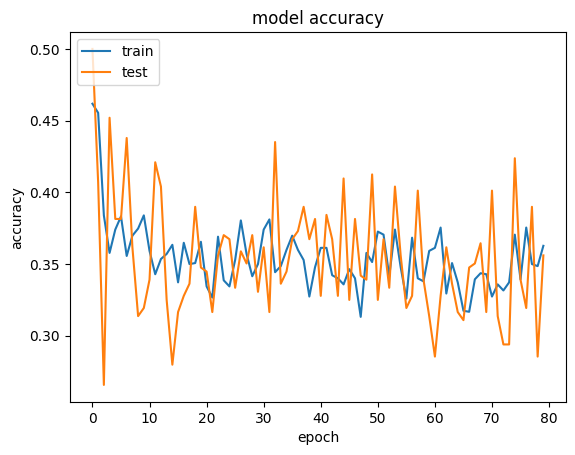

In [332]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

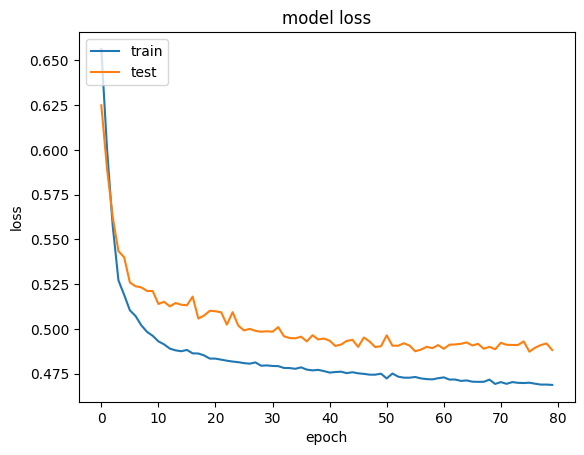

In [333]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# Visualize training process
plt.plot(history.history['loss'], label='Categorical Hinge loss (training data)')
plt.plot(history.history['val_loss'], label='Categorical Hinge loss (validation data)')
plt.title('Categorical Hinge loss for circles')
plt.ylabel('Categorical Hinge loss value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
df_temp = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df_temp.head()

# MLP Classifier

In [334]:
from sklearn.neural_network import MLPClassifier 

In [335]:
mlp_reg = MLPClassifier(hidden_layer_sizes=(120,80,40), alpha = 0.0001, 
                       max_iter = 50,activation = 'relu', learning_rate = 'adaptive', 
                       solver = 'adam' , early_stopping=True)

mlp_reg.fit(X_train, y_train)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(120, 80, 40),
              learning_rate='adaptive', max_iter=50)

In [336]:
trainpreds= mlp_reg.predict(X_train).round()
errortrain = accuracy_score(y_train, trainpreds)
print("the train score is " )
errortrain

the train score is 


0.5906002265005662

In [337]:
print(classification_report(y_train, trainpreds))

              precision    recall  f1-score   support

           0       0.57      0.78      0.66       639
           1       0.49      0.27      0.34       512
           2       0.66      0.67      0.66       615

    accuracy                           0.59      1766
   macro avg       0.57      0.57      0.56      1766
weighted avg       0.58      0.59      0.57      1766



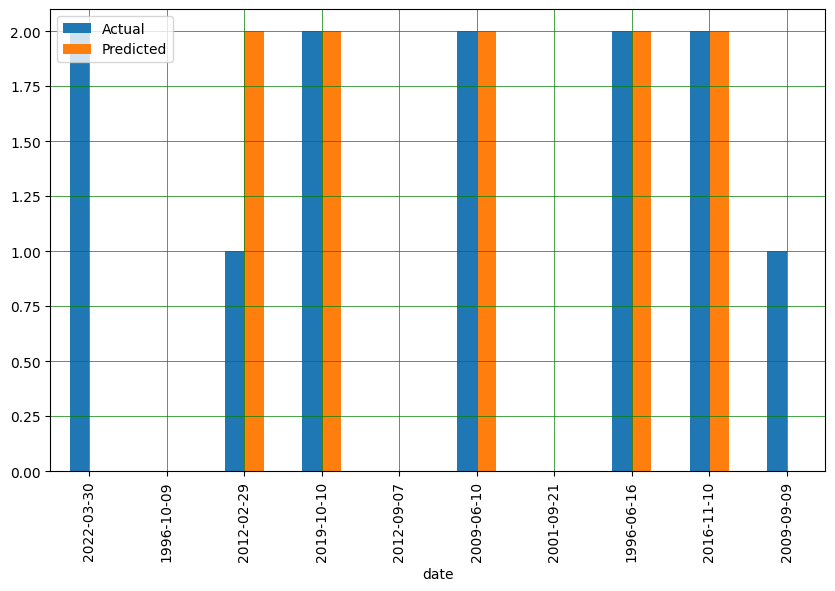

In [338]:
df_temp = df_temp.head(10)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [339]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 500],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [340]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 


KeyboardInterrupt



## Test 

In [341]:
y_pred = mlp_reg.predict(X_test).round()

In [342]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head(1)

,Actual,Predicted
date,,
2001-09-05,0,0


In [343]:
testpreds= mlp_reg.predict(X_test).round()
errortest = accuracy_score(y_test, testpreds)
print("the test score is " )
errortest

the test score is 


0.5574636723910171

In [344]:
print(classification_report(y_test, testpreds))

              precision    recall  f1-score   support

           0       0.56      0.80      0.66       274
           1       0.39      0.18      0.24       219
           2       0.62      0.62      0.62       264

    accuracy                           0.56       757
   macro avg       0.52      0.53      0.51       757
weighted avg       0.53      0.56      0.53       757



# Model choosen will be the KNN Classifier with 58% accuracy on train and 57% on test


# New search with rolling method on the variables "work in process"

In [ ]:
df = pd.read_csv('df_for_ML_countries_not_numeric.csv')
df.head()

In [ ]:
grouped_matches = df.groupby("home_team")

In [ ]:
group = grouped_matches.get_group("France").sort_values("date")

In [ ]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [ ]:
cols = ['home_team_score', 'away_team_score',
       'tournament', 'shoot_out', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

In [ ]:
matches_rolling = df.groupby("home_team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [ ]:
matches_rolling = matches_rolling.droplevel('home_team')


In [ ]:
matches_rolling.index = range(matches_rolling.shape[0])

In [ ]:
matches_rolling.loc[(matches_rolling['home_team'] == 'Qatar' )]

In [ ]:
def make_predictions(data, predictors):
    train = data[data.index < '2022-10-01']
    test = data[data.index < '2022-10-01']
    rf.fit(train[predictors], train["result"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["result"], predicted=preds), index=test.index)
    error = precision_score(test["result"], preds)
    return combined, error

In [ ]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json

# Utility Functions


def train_classifier(clf, X_train, y_train):
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    print("Model trained in {:2f} seconds".format(end-start))


def predict_labels(clf, features, target):
    start = time()
    y_pred = clf.predict(features)
    end = time()
    print("Made Predictions in {:2f} seconds".format(end-start))

    acc = sum(target == y_pred) / float(len(y_pred))

    return f1_score(target, y_pred, average='micro'), acc


def model(clf, X_train, y_train, X_test, y_test):
    train_classifier(clf, X_train, y_train)

    f1, acc = predict_labels(clf, X_train, y_train)
    print("Training Info:")
    print("-" * 20)
    print("F1 Score:{}".format(f1))
    print("Accuracy:{}".format(acc))

    f1, acc = predict_labels(clf, X_test, y_test)
    print("Test Metrics:")
    print("-" * 20)
    print("F1 Score:{}".format(f1))
    print("Accuracy:{}".format(acc))


def derive_clean_sheet(src):
    arr = []
    n_rows = src.shape[0]

    for data in range(n_rows):

        #[HTHG, HTAG]
        values = src.iloc[data].values
        cs = [0, 0]

        if values[0] == 0:
            cs[1] = 1

        if values[1] == 0:
            cs[0] = 1

        arr.append(cs)

    return arr


# Training & Testing


svc_classifier = SVC(random_state=100, kernel='rbf')
lr_classifier = LogisticRegression(multi_class='ovr', max_iter=500)
nbClassifier = GaussianNB()
dtClassifier = DecisionTreeClassifier()
rfClassifier = RandomForestClassifier()

# print("Support Vector Machine")
# print("-" * 20)
# model(svc_classifier, X_train, Y_train, X_test, Y_test)

print()
print("Logistic Regression one vs All Classifier")
print("-" * 20)
model(lr_classifier, X_train, y_train, X_test, y_test)

print()
print("Gaussain Naive Bayes Classifier")
print("-" * 20)
model(nbClassifier, X_train, y_train, X_test, y_test)

# print()
# print("Decision Tree Classifier")
# print("-" * 20)
# model(dtClassifier, X_train, Y_train, X_test, Y_test)

print()
print("Random Forest Classifier")
print("-" * 20)
model(rfClassifier, X_train, y_train, X_test, y_test)

# Exporting the Model
print()
print()
shouldExport = input('Do you want to export the model(s) (y / n) ? ')
if shouldExport.strip().lower() == 'y':
    exportedModelsPath = 'exportedModels'

    makedirs(exportedModelsPath, exist_ok=True)

    dump(lr_classifier, f'{exportedModelsPath}/lr_classifier.model')
    dump(nbClassifier, f'{exportedModelsPath}/nb_classifier.model')
    dump(rfClassifier, f'{exportedModelsPath}/rf_classifier.model')

    exportMetaData = dict()
    exportMetaData['home_teams'] = home_encoded_mapping
    exportMetaData['away_teams'] = away_encoded_mapping

    exportMetaDataFile = open(f'{exportedModelsPath}/metaData.json', 'w')
    json.dump(exportMetaData, exportMetaDataFile)

    print(f'Model(s) exported successfully to {exportedModelsPath}/')


Logistic Regression one vs All Classifier
--------------------
Model trained in 0.033907 seconds
Made Predictions in 0.000000 seconds
Training Info:
--------------------
F1 Score:0.5747451868629672
Accuracy:0.5747451868629672
Made Predictions in 0.000000 seconds
Test Metrics:
--------------------
F1 Score:0.5746367239101717
Accuracy:0.5746367239101717

Gaussain Naive Bayes Classifier
--------------------
Model trained in 0.000997 seconds
Made Predictions in 0.000000 seconds
Training Info:
--------------------
F1 Score:0.5645526613816535
Accuracy:0.5645526613816535
Made Predictions in 0.000000 seconds
Test Metrics:
--------------------
F1 Score:0.5627476882430648
Accuracy:0.5627476882430648

Random Forest Classifier
--------------------
Model trained in 0.441310 seconds
Made Predictions in 0.037147 seconds
Training Info:
--------------------
F1 Score:1.0
Accuracy:1.0
Made Predictions in 0.023111 seconds
Test Metrics:
--------------------
F1 Score:0.6605019815059445
Accuracy:0.660501981

Do you want to export the model(s) (y / n) ?  n
